## Neural networks history
- 1943: first artificial neuron
- 1957: first perceptron. Introduces weights to the inputs
- 1969: XOR problem
- 1986: multilayer perceptrons
- 2006: deep learning

Neural networks learn activation patterns on the neurons based on the input data. The activation patterns are learned by adjusting the weights of the inputs. The weights are adjusted by backpropagation. The backpropagation algorithm is a gradient descent algorithm that minimizes the error between the predicted and the actual output. The error is calculated by a loss function. The loss function is the mean squared error for regression problems and the cross entropy for classification problems.

A single perceptron can use only straight lines to separate the data.

**Universal approximation theorem:** a neural network with a single hidden layer can approximate any function.

# Install pytorch:

    pipenv install torch torchvision torchaudio

# Tensors

Tensors are the main data structure in pytorch. They are similar to numpy arrays. They can be used on the GPU.
A scalar is a tensor with a single value of zero dimensions. A vector is a tensor with a single dimension. A matrix is a tensor with two dimensions. And any structure with more than two dimensions is also a tensor of n dimensions.


## Tensors from lists

In [2]:
import torch

# creating a tensor from a list

list = [[1, 2, 3],
        [4, 5, 6]]

tns = torch.Tensor(list)
print('The default tensor type is', tns.dtype)
print('The tensor is\n', tns)

tns2 = torch.FloatTensor(list)
print('Float tensor type is', tns2.dtype)
print('This tensor was created with an explicit type\n', tns2)

# we have tensors of types int, float and bool.

tns3 = torch.DoubleTensor(list)
print('Double tensor type is', tns3.dtype)
print('Double tensor\n', tns3)

# for big ints
tns4 = torch.LongTensor(list)
print('Long tensor type is', tns4.dtype)
print('Long tensor\n', tns4)


The default tensor type is torch.float32
The tensor is
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Float tensor type is torch.float32
This tensor was created with an explicit type
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Double tensor type is torch.float64
Double tensor
 tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)
Long tensor type is torch.int64
Long tensor
 tensor([[1, 2, 3],
        [4, 5, 6]])


## Tensors from numpy arrays

In [3]:
import numpy as np

# 3 lines by 4 columns
arr = np.random.rand(3, 4)
print('Numpy type', arr.dtype)
print('Numpy array\n', arr)

tns5 = torch.from_numpy(arr)
# The type is preserved from numpy
print('Tensor type', arr.dtype)
print('Tensor from numpy\n', tns5)


Numpy type float64
Numpy array
 [[0.82088786 0.95180494 0.06314388 0.59080661]
 [0.65472658 0.13583574 0.12847251 0.04160122]
 [0.81763592 0.56863879 0.76855873 0.52055688]]
Tensor type float64
Tensor from numpy
 tensor([[0.8209, 0.9518, 0.0631, 0.5908],
        [0.6547, 0.1358, 0.1285, 0.0416],
        [0.8176, 0.5686, 0.7686, 0.5206]], dtype=torch.float64)


## Initialized tensors

In [4]:
tns6 = torch.ones(2, 3)
print('A 2 by 3 tensor filled with ones\n', tns6)

tns7 = torch.zeros(4, 5)
print('A 4 by 5 tensor filled with zeros\n', tns7)

# The n on randn stands for normal distribution
tns8 = torch.randn(3, 3)
print('A 3 by 3 tensor filled with random numbers\n', tns8)


A 2 by 3 tensor filled with ones
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
A 4 by 5 tensor filled with zeros
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
A 3 by 3 tensor filled with random numbers
 tensor([[-0.4750, -0.0564, -0.7545],
        [-1.1073, -0.7569, -1.2248],
        [-1.9463,  0.4757,  2.2929]])


## Tensor to numpy

In [5]:
arr2 = tns8.data.numpy()
print('A numpy converted from a tensor\n', arr2.dtype, '\n', arr2)


A numpy converted from a tensor
 float32 
 [[-0.47498035 -0.05640267 -0.75445825]
 [-1.1072991  -0.75687104 -1.2247511 ]
 [-1.9462861   0.47566575  2.292859  ]]


## Indexing

In [6]:
print(tns8, '\n')
# change a value
tns8[0, 2] = -10
print(tns8, '\n')

# accessing first and second lines only
print(tns8[0:2], '\n')

# all the lines from column two
print(tns8[:, 2], '\n')

# a single element in a zero dimensional tensor
print(tns[0, 2])


tensor([[-0.4750, -0.0564, -0.7545],
        [-1.1073, -0.7569, -1.2248],
        [-1.9463,  0.4757,  2.2929]]) 

tensor([[ -0.4750,  -0.0564, -10.0000],
        [ -1.1073,  -0.7569,  -1.2248],
        [ -1.9463,   0.4757,   2.2929]]) 

tensor([[ -0.4750,  -0.0564, -10.0000],
        [ -1.1073,  -0.7569,  -1.2248]]) 

tensor([-10.0000,  -1.2248,   2.2929]) 

tensor(3.)


## Tensor operations

All the operations are element-wise, point to point operations.

In [7]:
print(tns8.shape)
print('tns8:\n', tns8)
print(tns6.shape)
print('tns6:\n', tns6, '\n')

# to operate tensors they have to be of the same shape
tns82 = tns8[0:2, :]
print(tns82.shape, '\n')

print('sum:\n', tns6 + tns82)
# this multiplication is not the internal product
print('multiplication:\n', tns6 * tns82)
# for that we have to use a specific function. one of the tensors needs to be transposed
print('internal product:\n', torch.mm(tns6, tns82.T))
print('division:\n', tns6 / tns82)


torch.Size([3, 3])
tns8:
 tensor([[ -0.4750,  -0.0564, -10.0000],
        [ -1.1073,  -0.7569,  -1.2248],
        [ -1.9463,   0.4757,   2.2929]])
torch.Size([2, 3])
tns6:
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

torch.Size([2, 3]) 

sum:
 tensor([[ 0.5250,  0.9436, -9.0000],
        [-0.1073,  0.2431, -0.2248]])
multiplication:
 tensor([[ -0.4750,  -0.0564, -10.0000],
        [ -1.1073,  -0.7569,  -1.2248]])
internal product:
 tensor([[-10.5314,  -3.0889],
        [-10.5314,  -3.0889]])
division:
 tensor([[ -2.1054, -17.7297,  -0.1000],
        [ -0.9031,  -1.3212,  -0.8165]])


## .size() e .view()

In [8]:
# the same as shape
print('Shape of tns8:', tns8.size(), '\n---')

# creating a bigger tensor
tns9 = torch.randn(2, 2, 3)
print(f"tns9 shape {tns9.size()}:\n", tns9, '\n---')

# .view() resizes the tensor. 2*2*3=12
tns10 = tns9.view(12)
print('tns10:', tns10)
print('tns10 resized shape:', tns10.size(), '\n---')

# another way to flatten the tensor (special case)
tns11 = tns9.view(-1)
print('tns11 flattened with -1:', tns11, '\n---')

# changing to a different dimension
tns12 = tns9.view(4, 3)
print(f"tns12 flattened to shape {tns12.size()}:\n{tns12}\n---")

# maintain first dimension and flatten the rest
tns13 = tns9.view(tns9.size(0), -1)
print(f"tns13 shape {tns13.size()}\n{tns13}")


Shape of tns8: torch.Size([3, 3]) 
---
tns9 shape torch.Size([2, 2, 3]):
 tensor([[[-0.4064,  0.7562,  0.7939],
         [ 0.6511,  1.6954,  0.2142]],

        [[ 0.4574,  0.6703, -1.0378],
         [ 0.6799, -1.2500,  0.1668]]]) 
---
tns10: tensor([-0.4064,  0.7562,  0.7939,  0.6511,  1.6954,  0.2142,  0.4574,  0.6703,
        -1.0378,  0.6799, -1.2500,  0.1668])
tns10 resized shape: torch.Size([12]) 
---
tns11 flattened with -1: tensor([-0.4064,  0.7562,  0.7939,  0.6511,  1.6954,  0.2142,  0.4574,  0.6703,
        -1.0378,  0.6799, -1.2500,  0.1668]) 
---
tns12 flattened to shape torch.Size([4, 3]):
tensor([[-0.4064,  0.7562,  0.7939],
        [ 0.6511,  1.6954,  0.2142],
        [ 0.4574,  0.6703, -1.0378],
        [ 0.6799, -1.2500,  0.1668]])
---
tns13 shape torch.Size([2, 6])
tensor([[-0.4064,  0.7562,  0.7939,  0.6511,  1.6954,  0.2142],
        [ 0.4574,  0.6703, -1.0378,  0.6799, -1.2500,  0.1668]])


## GPU cast

In [9]:
# verify if there is a GPU
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('Device:', device)

tns14 = torch.randn(10)
tns14 = tns14.to(device)
print('GPU tensor:', tns14)


Device: cpu
GPU tensor: tensor([ 0.2350,  0.3613,  0.0164, -0.3918, -2.3454, -0.7493, -0.2199,  0.5408,
        -1.9708, -0.7365])


In [10]:
# concatenate tensors
print(f"tns13 shape {tns13.size()}\n{tns13}\n")
print(f"tns12 shape {tns12.size()}\n{tns12}\n")
tns15 = torch.cat((tns13, tns12.view(2, 6)), dim=0)
print(f"tns15 concatenated shape {tns15.size()} \n", tns15)


tns13 shape torch.Size([2, 6])
tensor([[-0.4064,  0.7562,  0.7939,  0.6511,  1.6954,  0.2142],
        [ 0.4574,  0.6703, -1.0378,  0.6799, -1.2500,  0.1668]])

tns12 shape torch.Size([4, 3])
tensor([[-0.4064,  0.7562,  0.7939],
        [ 0.6511,  1.6954,  0.2142],
        [ 0.4574,  0.6703, -1.0378],
        [ 0.6799, -1.2500,  0.1668]])

tns15 concatenated shape torch.Size([4, 6]) 
 tensor([[-0.4064,  0.7562,  0.7939,  0.6511,  1.6954,  0.2142],
        [ 0.4574,  0.6703, -1.0378,  0.6799, -1.2500,  0.1668],
        [-0.4064,  0.7562,  0.7939,  0.6511,  1.6954,  0.2142],
        [ 0.4574,  0.6703, -1.0378,  0.6799, -1.2500,  0.1668]])


In [11]:
tns16 = torch.randn(7, 7, 3)
print('tns16', tns16, '\n')
tns17 = torch.randn(147, 1)
print('tns17', tns17, '\n')

# sum the two tensors
tns18 = tns16.view(-1, 1)  # resize it to be 147
tns19 = tns18 + tns17
print('tns19', tns19)


tns16 tensor([[[ 0.2599,  1.0962, -1.3453],
         [ 0.9037,  0.3980,  1.1026],
         [-1.0011,  0.5911, -0.3973],
         [-2.7819, -1.0546,  0.6839],
         [ 0.7650, -0.0902, -0.5825],
         [ 0.7010,  0.1376, -0.9686],
         [ 0.0096,  1.0304,  1.0118]],

        [[-0.1296,  0.0703, -0.4621],
         [ 2.2503,  0.7529, -0.0154],
         [-0.8246, -0.2868, -0.4313],
         [-0.4334, -0.3948, -0.3146],
         [-0.7746,  0.5148, -0.5332],
         [ 0.2159,  0.5369, -0.4238],
         [-0.3691, -2.5247,  0.6291]],

        [[ 0.1968, -1.7898,  0.2430],
         [ 0.0776,  0.9397, -1.0444],
         [ 0.2595,  0.2556,  1.1634],
         [ 0.3481, -0.1733,  0.9189],
         [ 1.0494, -0.0451,  0.0101],
         [-0.4237, -0.4156,  1.8532],
         [ 0.5538, -0.9775, -0.1239]],

        [[-0.4587, -0.2524,  2.8007],
         [-0.3015, -0.5136, -0.9803],
         [-1.0262, -0.4138,  1.0048],
         [-0.4066,  1.6247,  1.1224],
         [-0.7712, -2.4456, -1.3554],


# Perceptron

## Linear classification

Equation of the straight line: ax + by + c = 0


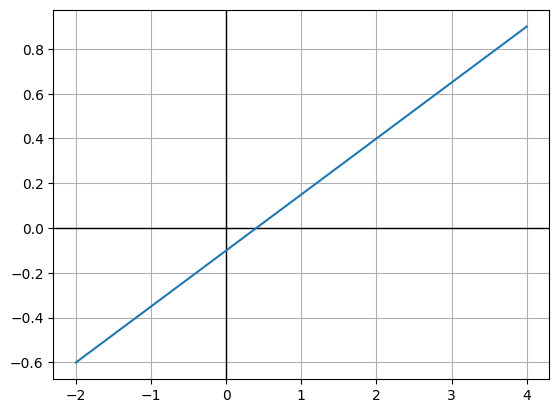

In [12]:
import numpy as np
import matplotlib.pyplot as plt

w1 = -1
w2 = 4
b = 0.4

def plotline(a, b, c):
    # creating a sequence of evenly spaced numbers, to create an x axis
    x = np.linspace(start=-2, stop=4, num=50)
    # print('x:', x, '\n')

    # calculate the values for y axis
    # we have ax+by+c=0
    # we get y by: y = (-ax-c)/b
    y = (-a*x-c)/b
    # print('y:', y)

    plt.axvline(x=0, ymin=-1, ymax=1, color='k', linewidth=1)  # plot y axis
    plt.axhline(y=0, xmin=-2, xmax=4, color='k', linewidth=1)  # plot x axis
    plt.plot(x, y)
    plt.grid(True)

plotline(w1, w2, b)


## Resolving the equation of the straight line for multiple points

p1_line:  0.00
p2_line: 1.80
p3_line: -4.20


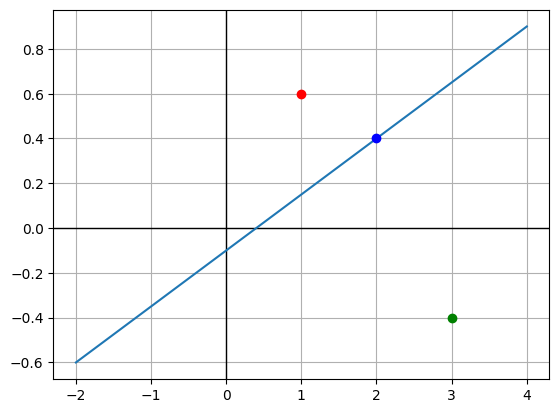

In [13]:
# the straight line equation when solved to a point on the line, will result in zero

# plot straight line
plotline(w1, w2, b)

# solve for p1
p1 = (2, 0.4)
p1_line = w1*p1[0] + w2*p1[1] + b
print(f"p1_line:  {p1_line:.2f}")
# plot p1
plt.plot(p1[0], p1[1], color='b', marker='o')

# solve for p2
p2 = (1, 0.6)
p2_line = w1*p2[0] + w2*p2[1] + b
print(f"p2_line: {p2_line:.2f}")
# plot p2
plt.plot(p2[0], p2[1], color='r', marker='o')

# solve for p3
p3 = (3, -0.4)
p3_line = w1*p3[0] + w2*p3[1] + b
print(f"p3_line: {p3_line:.2f}")
# plot p3
plt.plot(p3[0], p3[1], color='g', marker='o')

# p2_line resulted in a positive number, so any point above the line will be positive
# and any points bellow the line will be negative. Also, the module of the value indicates
# the distance of the point to the straight line.
# So, this straight line is a linear classifier.
# Summary:
# f(x) = 0: point is over the line
# f(x) > 0: point is above the line
# f9x) < 0: point is below the line
# ex. images of cats must be above and images of dogs must be below.
# And that's basically what perceptron does, because it is very similar to the straight line equation.


Line equation vs perceptron equation (two dimensions):

ax + by + c = 0

w1x + w2y + b = 0

Generalizing the perceptron for n dimensions:

sum(w_i*x_i) + b = 0

# Creating a distribution

X shape: (100, 2) Y shape: (100,)
Point: [-1.46725763 -0.22936217]. Class: 0


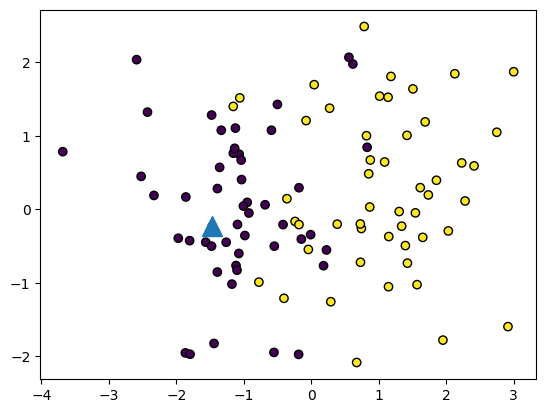

In [14]:
import numpy as np
from sklearn.datasets import make_classification

np.random.seed(46)

X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

print('X shape:', X.shape, 'Y shape:', y.shape)
# X are coordinate pairs, Y is the value for the X point

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

# get the tenth point
p = X[10]
print(f"Point: {p}. Class: {y[10]}")
plt.plot(p[0], p[1], marker='^', markersize=15)
# so, the blue dots are class 0 and yellow dots are class 1


-5


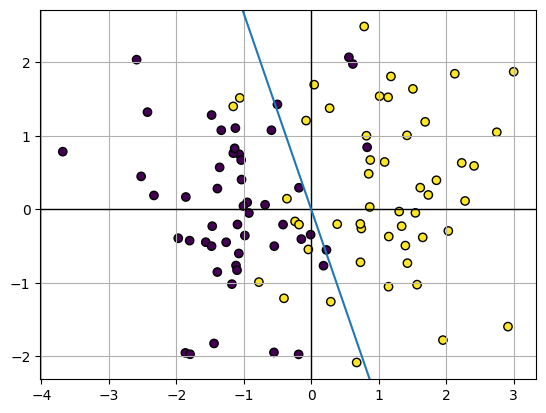

In [15]:
def plot_model(w1, w2, b):
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

    x_min, x_max = plt.gca().get_xlim()
    y_min, y_max = plt.gca().get_ylim()

    x = np.linspace(start=-2, stop=4, num=50)
    _y = (-w1*x-b)/w2

    plt.axvline(x=0, ymin=-1, ymax=1, color='k', linewidth=1)  # plot y axis
    plt.axhline(y=0, xmin=-2, xmax=4, color='k', linewidth=1)  # plot x axis
    plt.plot(x, _y)
    plt.grid(True)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

# weights and bias that separate the data
w1 = 8
w2 = 3
b = 0
plot_model(w1, w2, b)

# How to discover which class is on the positive or negative side of the straight line?
# Get a point on a certain class and resolve the straight line equation for that point and see if it's positive or negative
p = (-1, 1)
print(w1*p[0] + w2*p[1] + b)
# if the equation resolution to a point is negative the class is 0 blue, otherwise it's yellow class 1.


Point: (2, -1). Class: 1. Color: yellow


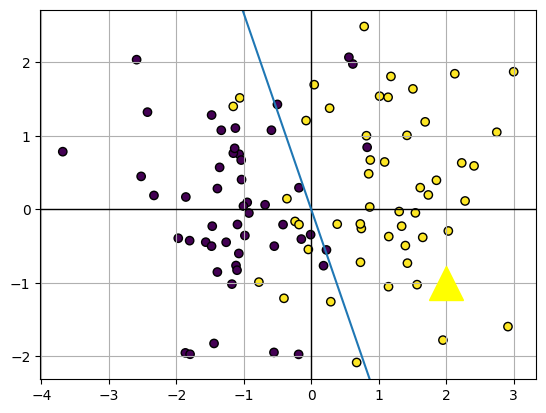

In [16]:
def classify(point, w1, w2, b):
    line = w1*point[0] + w2*point[1] + b

    if line >= 0:
        return 1, "yellow"
    else:
        return 0, "blue"

p = (2, -1)
point_class, color = classify(p, w1, w2, b)
print(f"Point: {p}. Class: {point_class}. Color: {color}")
plot_model(w1, w2, b)
plt.plot(p[0], p[1], marker="^", color=color, markersize=25)


In [17]:
# Let's calculate the accuracy

hits = 0
for i in range(len(X)):
    point_class, _ = classify(X[i], w1, w2, b)

    if point_class == y[i]:
        hits += 1

print(f"Accuracy: {(hits/len(X))*100}%")


Accuracy: 85.0%


# Pytorch nn

In [18]:
from torch import nn

torch.manual_seed(42)

# Instantiating a linear layer
perceptron = nn.Linear(in_features=3, out_features=1)
print(perceptron)


Linear(in_features=3, out_features=1, bias=True)


In [19]:
# accessing perceptron weights
for name, tensor in perceptron.named_parameters():
    print(name, tensor.data)

# Another way of accessing the data
print('\nWeights: ', perceptron.weight.data)
print('Bias: ', perceptron.bias.data)


weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

Weights:  tensor([[ 0.4414,  0.4792, -0.1353]])
Bias:  tensor([0.5304])


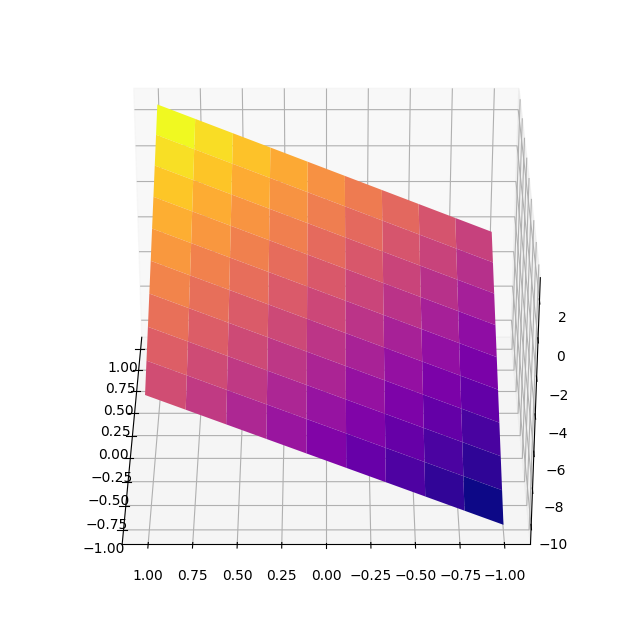

In [20]:
# make a 3D surface plot of the perceptron

def plot3d(perceptron):
    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()

    X1 = np.linspace(-1, 1, 10)
    X2 = np.linspace(-1, 1, 10)

    # first and second dimensions
    X1, X2 = np.meshgrid(X1, X2)

    # third dimension
    X3 = (b - w1*X1 - w2*X2)/w3

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=180)

    ax.plot_surface(X1, X2, X3, cmap='plasma')

plot3d(perceptron)


# Forwarding the data over the perceptron

y: tensor([-0.2194], grad_fn=<ViewBackward0>)


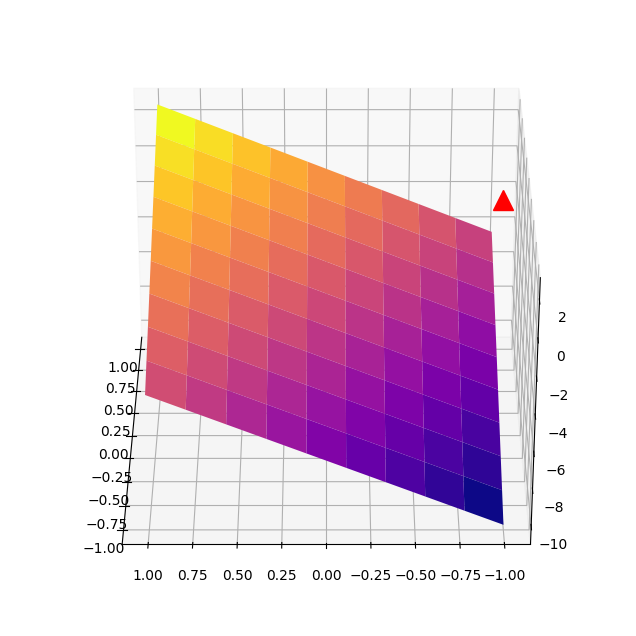

In [21]:
# point to classify
X2 = torch.Tensor([0, -1, 2])
# result of the inference
y = perceptron(X2)  # -> that's the forward step
print('y:', y)
# y returned negative, so, above the plane
# the positive returns will be below the plane

plot3d(perceptron)
plt.plot(X2[0], X2[1], X2[2], color='r', marker='^', markersize=15)


# Activation functions
An activation function is a function that is applied to the output of a neuron. It is used to introduce non-linearity to the model. Without non-linearity, the model would be a linear model.

Some popular activation functions are:
* Sigmoid: 1/(1+e^-x)
* Tanh: (e^x - e^-x)/(e^x + e^-x)
* ReLU: max(0, x)
* Leaky ReLU: max(0.01x, x)
* Softmax: e^x_i / sum(e^x_i)


-5


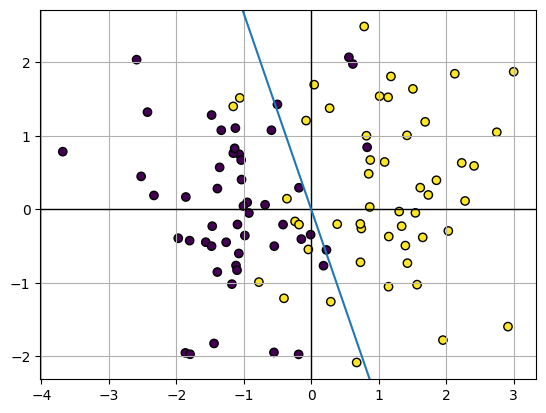

In [22]:
np.random.seed(46)

X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

def plot_model2(w1, w2, b):
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

    x_min, x_max = plt.gca().get_xlim()
    y_min, y_max = plt.gca().get_ylim()

    x = np.linspace(start=-2, stop=4, num=50)
    _y = (-w1*x-b)/w2

    plt.axvline(x=0, ymin=-1, ymax=1, color='k', linewidth=1)  # plot y axis
    plt.axhline(y=0, xmin=-2, xmax=4, color='k', linewidth=1)  # plot x axis
    plt.plot(x, _y)
    plt.grid(True)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

# weights and bias that separate the data
w1 = 8
w2 = 3
b = 0
plot_model(w1, w2, b)

# How to discover which class is on the positive or negative side of the straight line?
# Get a point on a certain class and resolve the straight line equation for that point and see if it's positive or negative
p = (-1, 1)
print(w1*p[0] + w2*p[1] + b)


In [23]:
perceptron2 = nn.Linear(2, 1)
sigmoid = nn.Sigmoid()

print('Perceptron with random initialization:')
print(perceptron2.weight.data)
print(perceptron2.bias.data, '\n')

# manually setting weight and bias
perceptron2.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron2.bias = nn.Parameter(torch.Tensor([b]))

print('Perceptron with manual initialization:')
print(perceptron2.weight.data)
print(perceptron2.bias.data)


Perceptron with random initialization:
tensor([[-0.1549,  0.1427]])
tensor([-0.3443]) 

Perceptron with manual initialization:
tensor([[8., 3.]])
tensor([0.])


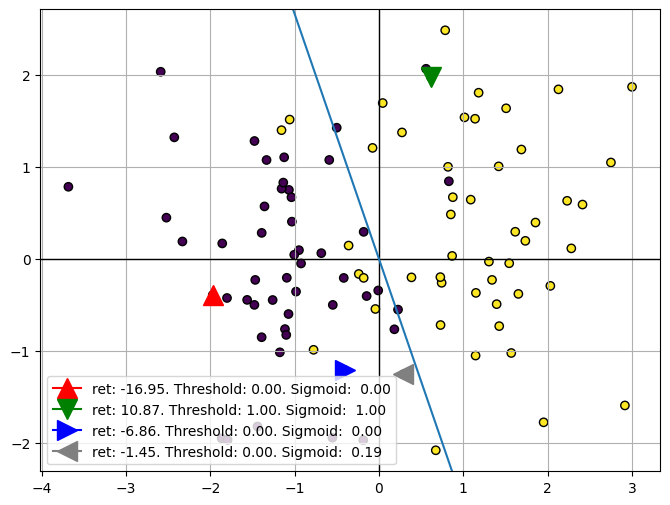

In [24]:
# creating a list of markers and colors
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plot_model2(w1, w2, b)

# uncomment according to the set of points you want to see
# points = [17, 21, 43, 66]
points = [1, 2, 3, 4]

# let's use the perceptron for some points
for i, element, in enumerate(points):
    x = torch.Tensor(X[element])

    ret = perceptron2(x)
    activation = sigmoid(ret)  # activating perceptron's output
    # other options are:
    # nn.ReLU()
    # nn.Tanh()

    activation_threshold = 0 if ret.data < 0 else 1

    label = f"ret: {ret.data.numpy()[0]:5.2f}. Threshold: {activation_threshold:4.2f}. Sigmoid: {activation.data.numpy()[0]:5.2f}"

    plt.plot(x[0], x[1], marker=markers[i], color=colors[i], label=label, markersize=15)

plt.legend()
plt.show()
# the limiar function doesn't indicate if the point is far or near the boundary line,
# while the sigmoid does indicate that. Around 0.5 is near the boundary line.
# Near the line is the confusion zone, where the perceptron is not sure about the class.


# Multiclass classification
A single perceptron can only separate two classes. To separate more than two classes, we need to use multiple perceptrons. Each perceptron will separate one class from the others. The output of the perceptrons will be the probability of the input belonging to each class. The class with the highest probability will be the predicted class.

## Backpropagation
Backpropagation is the algorithm used to adjust the weights of the perceptrons. It is a gradient descent algorithm that minimizes the error between the predicted and the actual output. The error is calculated by a loss function. The loss function is the mean squared error for regression problems and the cross entropy for classification problems.

## Multilayer perceptrons
A multilayer perceptron is a neural network with multiple layers. The first layer is the input layer. The last layer is the output layer. The layers in between are the hidden layers. The hidden layers can have any number of neurons. The output layer has the same number of neurons as the number of classes. The activation function of the output layer is the softmax function.

With multilayers we can separate data with curved functions.

## Creating a PyThorch arquitecture

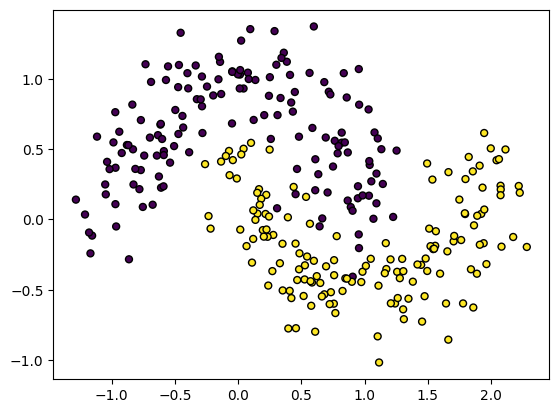

In [25]:
# Example of non-linearly separable data distribution
from sklearn.datasets import make_moons

X2, Y2 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')


## nn.sequential

In [29]:
input_size = 2
hidden_size = 16
output_size = 1  # because the problem has only two possible output values

net = nn.Sequential(
    nn.Linear(in_features=input_size, out_features=hidden_size),  # Hidden layer
    nn.ReLU(),  # non-linear activation layer. This is a hyperparameter to be chosen by the deleloper
    nn.Linear(in_features=hidden_size, out_features=output_size)  # output layer
  )

print(net)


Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
)


In [ ]:
from torchsummary import summary
